# Gini Index Method

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
dataset=pd.read_csv("Cancer_dataset.csv")

In [3]:
X=dataset.drop("Class",axis=1)
y=dataset["Class"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [14]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [15]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6752136752136753


In [16]:
CM=metrics.confusion_matrix(y_test, y_pred)

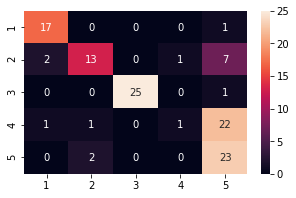

In [17]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(CM, index = ['1','2','3','4','5'],columns = ['1','2','3','4','5'])
plt.figure(figsize = (5,3))
sn.heatmap(df_cm, annot=True)

In [18]:
C=np.array(CM)

In [19]:
np.sum(C.diagonal())

79

In [20]:
FP = CM.sum(axis=0) - np.diag(CM)  
FN = CM.sum(axis=1) - np.diag(CM)
TP = np.diag(CM)
TN = CM.sum() - (FP + FN + TP)
FP=sum(FP)
FN=sum(FN)
TP=sum(TP)
TN=sum(TN)

In [21]:
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print('Sensitivity',TPR)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
print('\nSpecificity',TNR)
# Precision or positive predictive value
PPV = TP/(TP+FP)
print("\nPrecision",PPV)

Sensitivity 0.6752136752136753

Specificity 0.9188034188034188

Precision 0.6752136752136753


In [22]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=5)
metrics.auc(fpr, tpr)

0.7884782608695652